# Computer Vision - P1

### **Carefully read the following instructions before start coding.**

==============================================================================================

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments and answers need to be in **English**.

- The deliverable must be a file named **P1_Student1_Student2.zip** that includes:
    - The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): September 27, 23:00 h** 

==============================================================================================

## Practicum 1: Basics on Image Processing and Manipulation
==============================================================================================

The main topics are:

1. Image loading, saving and creation

2. Color manipulation 

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

==============================================================================================
### Packages loading 

First we need to import the required Python packages for basic image manipulation. 

Run the following code:

In [231]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks
from skimage.transform import resize
from skimage import img_as_ubyte 
from skimage.color import rgb2gray
from skimage.transform import rescale
from skimage import img_as_uint
from skimage.color import rgba2rgb
from skimage.exposure import rescale_intensity


Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the 
notebook**):

In [232]:
%matplotlib inline

==============================================================================================


## 1.1 Image creation

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) Create and display a grayscale image that has 100 rows and 200 columns where each value should be of type unsigned integer with 8 bits. 

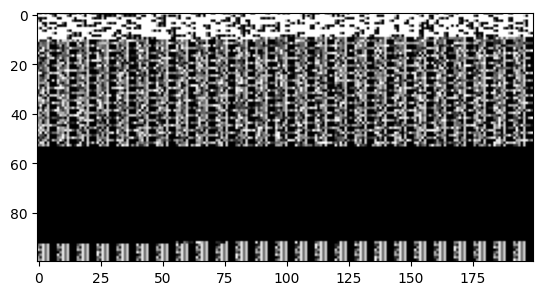

In [233]:
# create a random matrix of size 100 x 200
imageGrayscale = np.empty((100, 200), dtype=np.uint8)

#plot image on grayscale
plt.imshow(imageGrayscale, cmap='gray')

How many different values can each pixel have in this case? 

In [234]:
#Your solution
'''
The value of each pixel is: 0 to 255,  both inclusive.
'''


'\nThe value of each pixel is: 0 to 255,  both inclusive.\n'

b) Change the color of the pixels of the image in such a way that the right half is black (0) and the left half is white (255).

Visualize the image and print the values of its first row.

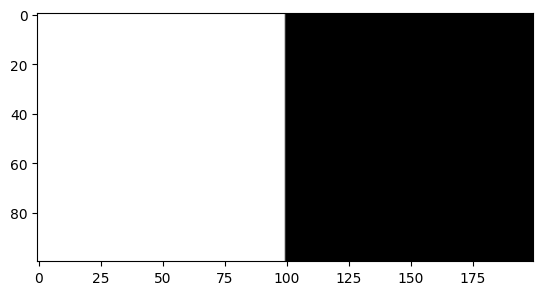

In [235]:
#Your solution

# select the corresponding range of pixels and modify to the color requested
imageGrayscale[:, 0:100] = 255
imageGrayscale[:, 100:200] = 0

plt.imshow(imageGrayscale, cmap='gray')

###  1.2 Image saving and loading

a) Use the IO image package to save the previously image:

In [236]:
#Your solution
io.imsave('images_notebook/image-Grayscale-HalfBlackHalfWhite.jpeg',imageGrayscale)


b) Load the saved image and visualize it. Print the dimensions, the value of pixel (20,30) and data type in order to check everything is correct

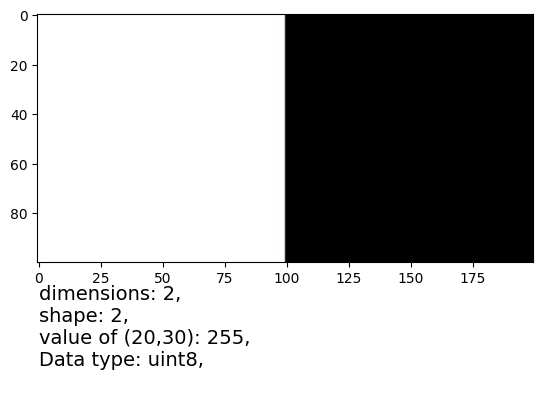

In [237]:
#Your solution

image_saved = io.imread('images_notebook/image-Grayscale-HalfBlackHalfWhite.jpeg')

# get image informations
image_saved_dim = image_saved.ndim
image_saved_shape = image_saved.ndim
image_saved_value = image_saved[20,30]
image_saved_type = image_saved.dtype

image_saved_details = f"\
dimensions: {image_saved_dim}, \n\
shape: {image_saved_shape}, \n\
value of (20,30): {image_saved_value}, \n\
Data type: {image_saved_type}, \n"

# plot the image with information
plt.imshow(image_saved, cmap='gray')
plt.text(0, 150, image_saved_details, fontsize=14)
plt.show()

### 1.3 Color image manipulation

a) Load and show the image `images_notebook/lenna.jpg`, and check its dimensions and data type.

**Note:** Pictures may appear in the figure with pseudocolors. What commands to use in order to display them in **RGB** color and in **grayscale**?! 

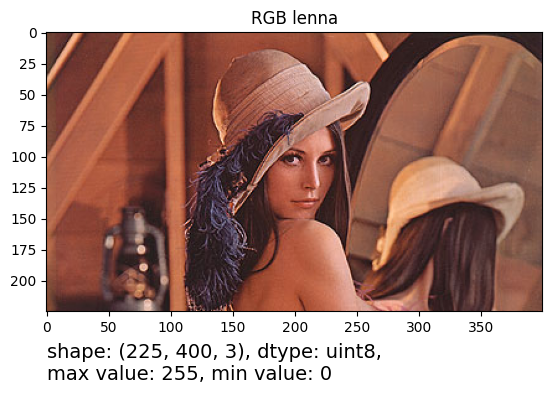

In [238]:
#Your solution

image_lenna = io.imread('images_notebook/lenna.jpg')

# get RGB lenna image informations
image_lenna_shape = image_lenna.shape
image_lenna_type = image_lenna.dtype
image_lenna_max = image_lenna.max()
image_lenna_min = image_lenna.min()
image_lenna_details = f"\
shape: {image_lenna_shape}, dtype: {image_lenna_type}, \n\
max value: {image_lenna_max}, min value: {image_lenna_min}"

plt.imshow(image_lenna)
plt.title('RGB lenna')
plt.text(0, 280, image_lenna_details, fontsize=14)
plt.show()

b) Convert the previous image to grayscale, and **save it**.

Moreover, plot the two images (RGB & greyscale) in a single figure, and show details such as shape, dtype, max and min values.

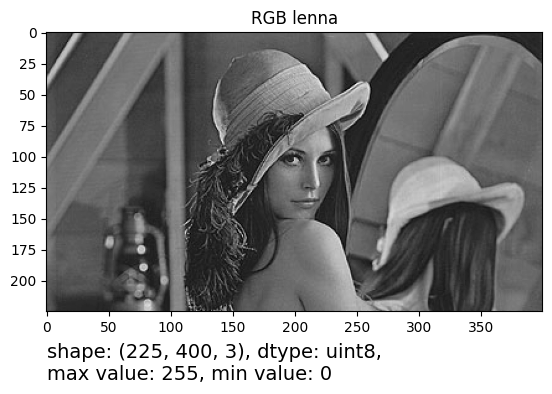

In [239]:
#Your solution

# convert an RGB image to grayscale image
image_lenna_gray = rgb2gray(image_lenna)

# get grayscale lenna image informations
image_lenna_gray_shape = image_lenna_gray.shape
image_lenna_gray_type = image_lenna_gray.dtype
image_lenna_gray_max = image_lenna_gray.max()
image_lenna_gray_max = image_lenna_gray.min()

image_lenna_gray_details = f"\
shape: {image_lenna_shape}, dtype: {image_lenna_type}, \n\
max value: {image_lenna_max}, min value: {image_lenna_min}"

plt.imshow(image_lenna_gray, cmap='gray')
plt.title('RGB lenna')
plt.text(0, 280, image_lenna_gray_details, fontsize=14)
plt.show()



c) Compute the mean of the previous grayscale image and use a logical operation to obtain a boolean image. Pixels greather than the mean value must be shown as white. Display the binary image.

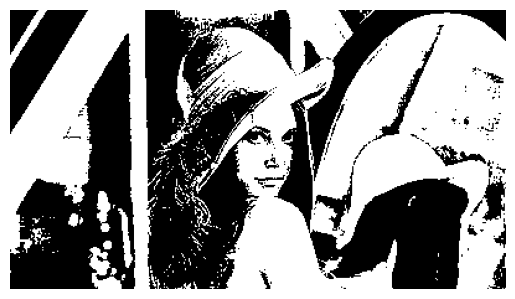

In [240]:
#Your solution

# get mean of the image
image_lenna_gray_meanvalue = np.mean(image_lenna_gray)

binary_image_lenna = image_lenna_gray.copy()

# Convert to binary image according to the mean value
binary_image_lenna[image_lenna_gray >= image_lenna_gray_meanvalue] = True
binary_image_lenna[image_lenna_gray < image_lenna_gray_meanvalue] = False

plt.imshow(binary_image_lenna, cmap='gray')
plt.axis('off')
plt.show()

d) Visualize in the same figure all the three images: (1) the original image, (2) the gray image, and (3) the binarized image. Set the corresponding titles of the images.

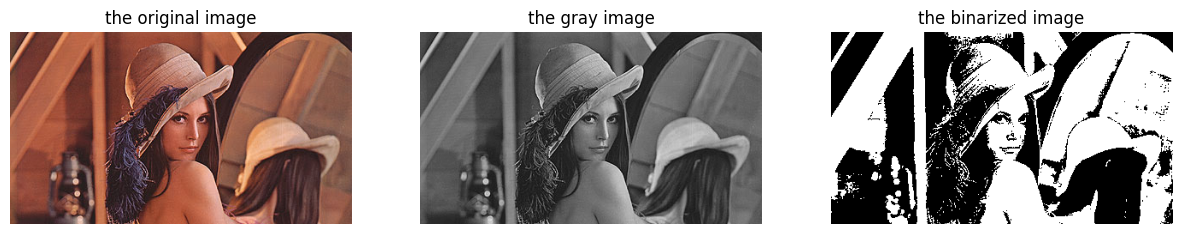

In [241]:
#Your solution
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

ax = axs[0]
ax.imshow(image_lenna)
ax.axis('off')
ax.set_title('the original image')

ax = axs[1]
ax.imshow(image_lenna_gray, cmap='gray')
ax.axis('off')
ax.set_title('the gray image')

ax = axs[2]
ax.imshow(binary_image_lenna, cmap='gray')
ax.axis('off')
ax.set_title('the binarized image')
plt.show()

### 1.4 Images manipulation

a) Create an RGB black image, 10% larger than the Lenna image. Afterwards, embed the Lenna image in the center. Show the framed image.

**Note:** Be carefull with the number of channels.

**Note:** Print the original image shape and the new image size to check if the sizes of the second one are 10% larger then the first one. 


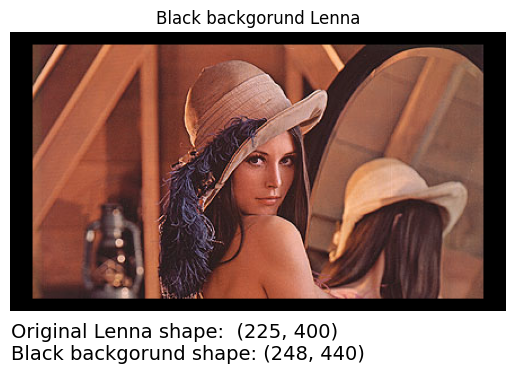

In [242]:
#Your solution

# resize in according to the size of the lenna picture
black_background = rescale(image_lenna, 1.1)

# Set the image to a black background image
black_background[:,:,:] = 0  
    
background_height, background_widht, backgound_depth = black_background.shape
lenna_height, lenna_widht, lenna_depth = image_lenna.shape

# calculate the starting position of the small picture in the large picture
lenna_start_pos_height =  round((background_height - lenna_height) / 2)
lenna_start_pos_width = round((background_widht - lenna_widht) / 2)

# according to the obtained coordinates, put the lenna image into the background image
back_backgound_lenna = black_background.copy()
back_backgound_lenna[lenna_start_pos_height:lenna_start_pos_height+lenna_height,
                     lenna_start_pos_width:lenna_start_pos_width+lenna_widht] = image_lenna

back_backgound_lenna = back_backgound_lenna.astype(int)

# get image information
back_backgound_lenna_size = f"\
Original Lenna shape:  ({lenna_height}, {lenna_widht}) \n\
Black backgorund shape: ({background_height}, {background_widht})"

plt.imshow(back_backgound_lenna)
plt.title('Black backgorund Lenna')
plt.text(0, 290, back_backgound_lenna_size, fontsize=14)
plt.axis('off')
plt.show()

b) Change the frame of the new image to green. Visualize the three images: original, black frame and green frame, in one single figure, with their respective titles.

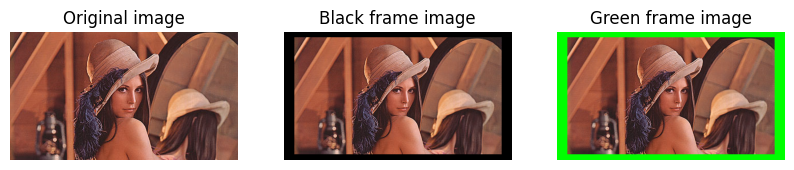

In [243]:
#Your solution

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,10))

ax = axs[0]
ax.imshow(image_lenna)
ax.axis('off')
ax.set_title('Original image')

ax = axs[1]
ax.imshow(back_backgound_lenna,cmap='gray')
ax.axis('off')
ax.set_title('Black frame image')


ax = axs[2]
green_backgound_lenna = black_background.copy()
# Color the green layer in rgb (layer 2 of RGB)
green_backgound_lenna[:,:,1] = 255
green_backgound_lenna[lenna_start_pos_height:lenna_start_pos_height+lenna_height,
                      lenna_start_pos_width:lenna_start_pos_width+lenna_widht] = image_lenna

green_backgound_lenna = green_backgound_lenna.astype(int)
ax.imshow(green_backgound_lenna, cmap='gray')
ax.axis('off')
ax.set_title('Green frame image')

plt.show()

### 1.5 Contrast enhancement

a) Open the image `images_notebook/car_lowContrast.jpg` and visualize it without graylevel enhancement. Print the image size, data type, minimum and maximum of the image. 

**Note:** When running the function `imshow()` the image is authomatically enhanced. Use the `vmin` and `vmax` parameters in order to deactivate the enhancement applied by default. To this purpose, check the data type and used the maximum and minimum value corresponding to this type.


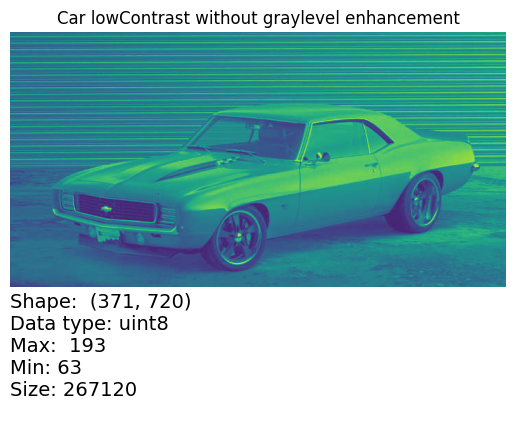

In [244]:
#Your solution

image_carLowContrast = io.imread('images_notebook/car_lowContrast.jpg')

# get image information
image_carLowContrast_detail = f"\n\
Shape:  {image_carLowContrast.shape} \n\
Data type: {image_carLowContrast.dtype} \n\
Max:  {image_carLowContrast.max()} \n\
Min: {image_carLowContrast.min()} \n\
Size: {image_carLowContrast.size} \n "

plt.imshow(image_carLowContrast, vmin=image_carLowContrast.min(), vmax=image_carLowContrast.max())
plt.title('Car lowContrast without graylevel enhancement')
plt.text(0, 560, image_carLowContrast_detail, fontsize=14)
plt.axis('off')

plt.show()

b) Create an image called `dark_image` using the  values from the original one. Compute the minimum value of the image and substract this value of the original image. Print the new maximum a minimum values. Show the new image without graylevel enhancement.

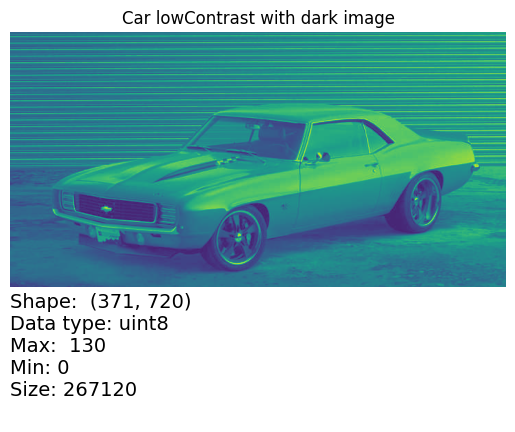

In [245]:
#Your solution

dark_image_carLowContrast = image_carLowContrast.copy()

# get minimum value of image car low contrast
dark_image = image_carLowContrast.min()

# substract image to minimum value of image 
dark_image_carLowContrast -= dark_image


dark_image_carLowContrast_detail = f"\n\
Shape:  {dark_image_carLowContrast.shape} \n\
Data type: {dark_image_carLowContrast.dtype} \n\
Max:  {dark_image_carLowContrast.max()} \n\
Min: {dark_image_carLowContrast.min()} \n\
Size: {dark_image_carLowContrast.size} \n "


plt.imshow(dark_image_carLowContrast, vmin=dark_image_carLowContrast.min(), vmax=dark_image_carLowContrast.max())
plt.title('Car lowContrast with dark image')
plt.text(0, 560, dark_image_carLowContrast_detail, fontsize=14)
plt.axis('off')

plt.show()



c) Similarly to the previous question, create a new image called `bright_im` from the original one, so that the maximal value of the new image is 255. Check the minimal and maximal values of the new image, and show the new image without graylevel enhancement.


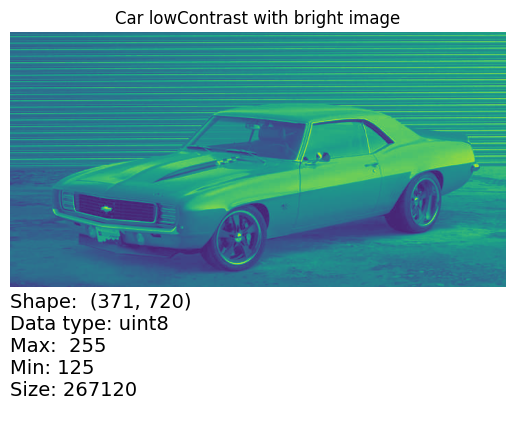

In [246]:
#Your solution
bright_image_carLowContrast = image_carLowContrast.copy()

# get maximal value of the image 
bright_image = 255 - image_carLowContrast.max()

# substract image to maximal value of image 
bright_image_carLowContrast += bright_image


bright_image_carLowContrast_detail = f"\n\
Shape:  {bright_image_carLowContrast.shape} \n\
Data type: {bright_image_carLowContrast.dtype} \n\
Max:  {bright_image_carLowContrast.max()} \n\
Min: {bright_image_carLowContrast.min()} \n\
Size: {bright_image_carLowContrast.size} \n "

plt.imshow(bright_image_carLowContrast, vmin=bright_image_carLowContrast.min(), vmax=bright_image_carLowContrast.max())
plt.title('Car lowContrast with bright image')
plt.text(0, 560, bright_image_carLowContrast_detail, fontsize=14)
plt.axis('off')



plt.show()


d) Apply contrast enhancement to the original image. There are two ways for it: (1) by direct manipulation, and (2) through scikit-image command [rescale_intensity](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.rescale_intensity). Check the minimal and maximal values of the enhanced image, and compare them with the previous one. Show the two images  without graylevel enhancement.

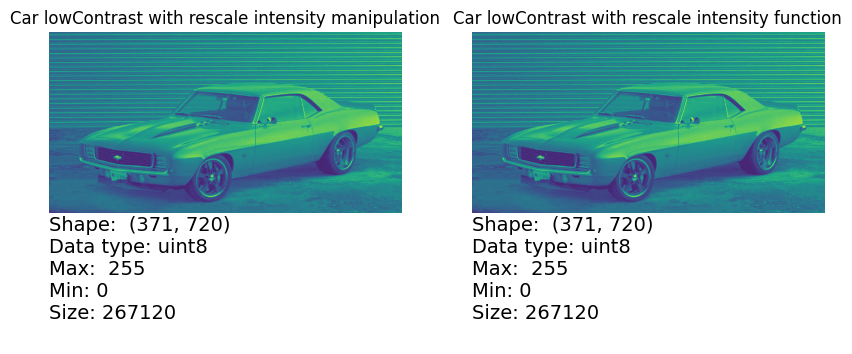

In [253]:
#Your solution

fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(10,10))

# apply contrast enhancement by direct manipulation
ax = axs[0]

image_carLowContrast_rescale_intensity_manipulation = image_carLowContrast.copy()
min_value_image = image_carLowContrast_rescale_intensity_manipulation.min()
max_value_image = image_carLowContrast_rescale_intensity_manipulation.max()

# apply contrast enhancement use formula
image_carLowContrast_rescale_intensity_manipulation = ( ((image_carLowContrast_rescale_intensity_manipulation - min_value_image ) / (max_value_image  - min_value_image) ) * 255 + 0).astype(np.uint8)

image_carLowContrast_rescale_intensity_manipulation_detail = f"\n\
Shape:  {image_carLowContrast_rescale_intensity_manipulation.shape} \n\
Data type: {image_carLowContrast_rescale_intensity_manipulation.dtype} \n\
Max:  {image_carLowContrast_rescale_intensity_manipulation.max()} \n\
Min: {image_carLowContrast_rescale_intensity_manipulation.min()} \n\
Size: {image_carLowContrast_rescale_intensity_manipulation.size} \n "

ax.imshow(image_carLowContrast_rescale_intensity_manipulation, vmin=image_carLowContrast_rescale_intensity_manipulation.min(), vmax=image_carLowContrast_rescale_intensity_manipulation.max())
ax.set_title('Car lowContrast with rescale intensity manipulation')
ax.text(0, 630, image_carLowContrast_rescale_intensity_manipulation_detail, fontsize=14)
ax.axis('off')


# apply contrast enhancement by function rescale_intensity
ax = axs[1]

image_carLowContrast_rescale_intensity_function = image_carLowContrast.copy()

# apply function rescale_intensity
image_carLowContrast_rescale_intensity_function = rescale_intensity(image_carLowContrast_rescale_intensity_function)

image_carLowContrast_rescale_intensity_function_detail = f"\n\
Shape:  {image_carLowContrast_rescale_intensity_function.shape} \n\
Data type: {image_carLowContrast_rescale_intensity_function.dtype} \n\
Max:  {image_carLowContrast_rescale_intensity_function.max()} \n\
Min: {image_carLowContrast_rescale_intensity_function.min()} \n\
Size: {image_carLowContrast_rescale_intensity_function.size} \n "

ax.imshow(image_carLowContrast_rescale_intensity_function, vmin=image_carLowContrast_rescale_intensity_function.min(), vmax=image_carLowContrast_rescale_intensity_function.max())
ax.set_title('Car lowContrast with rescale intensity function')
ax.text(0, 630, image_carLowContrast_rescale_intensity_function_detail, fontsize=14)
ax.axis('off')


plt.show()


e) Visualize the 5 images in the same figure, each one with its corresponding title.

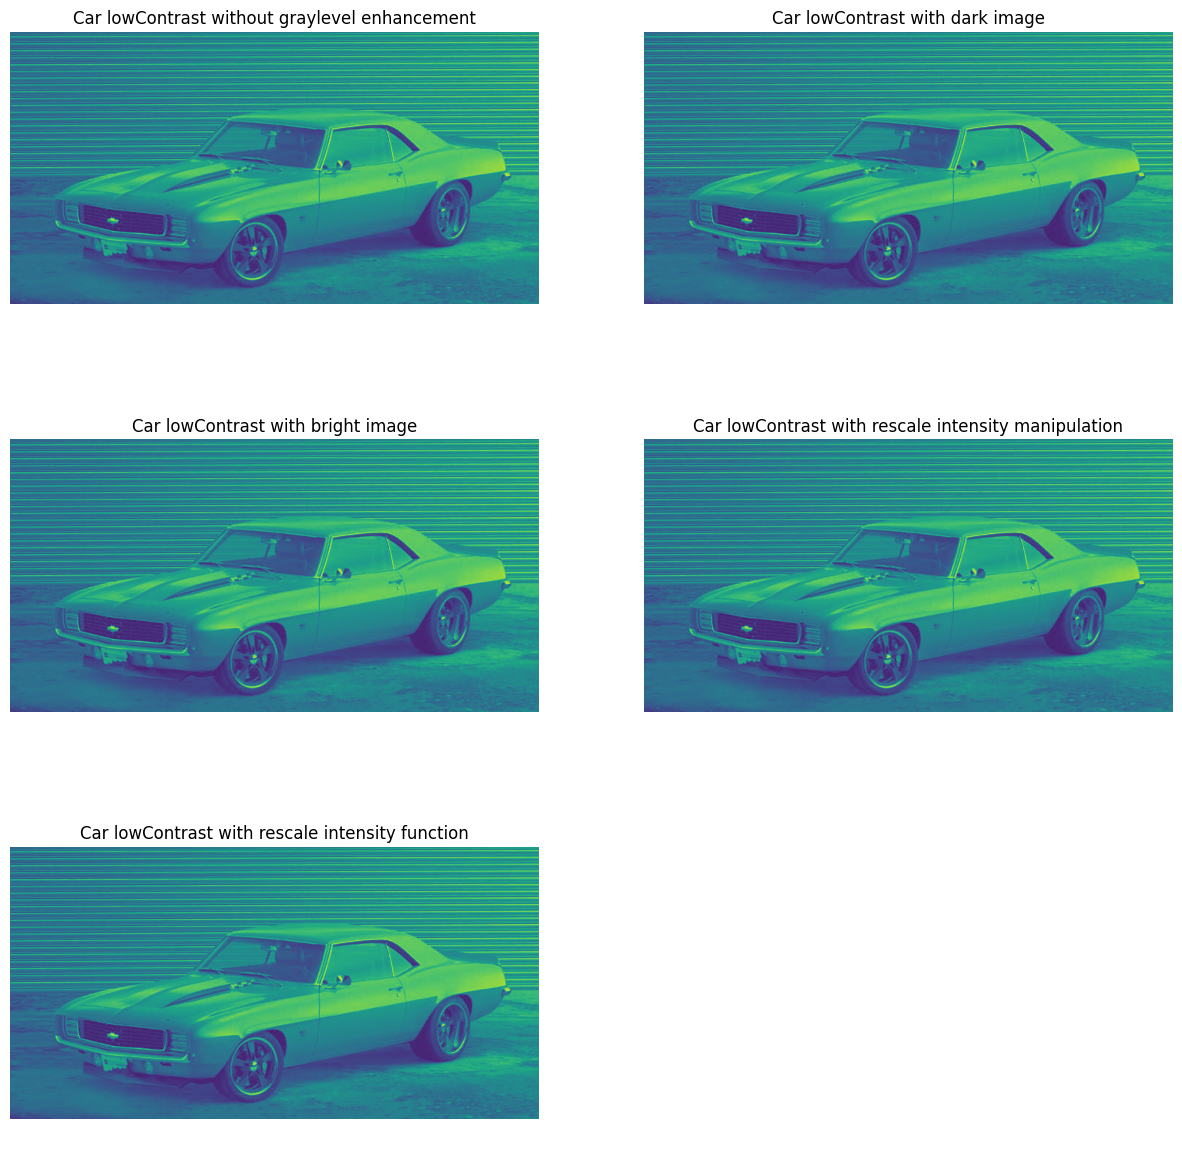

In [248]:
#Your solution
fig, axs = plt.subplots(nrows=3, ncols=2,figsize=(15,15))


ax = axs[0][0]

ax.imshow(image_carLowContrast, vmin=image_carLowContrast.min(), vmax=image_carLowContrast.max())
ax.set_title('Car lowContrast without graylevel enhancement')
ax.axis('off')



ax = axs[0][1]
ax.imshow(dark_image_carLowContrast, vmin=dark_image_carLowContrast.min(), vmax=dark_image_carLowContrast.max())
ax.set_title('Car lowContrast with dark image')
ax.axis('off')



ax = axs[1][0]
ax.imshow(bright_image_carLowContrast, vmin=bright_image_carLowContrast.min(), vmax=bright_image_carLowContrast.max())
ax.set_title('Car lowContrast with bright image')
ax.axis('off')



ax = axs[1][1]
ax.imshow(image_carLowContrast_rescale_intensity_manipulation, vmin=image_carLowContrast_rescale_intensity_manipulation.min(), vmax=image_carLowContrast_rescale_intensity_manipulation.max())
ax.set_title('Car lowContrast with rescale intensity manipulation')
ax.axis('off')



ax = axs[2][0]
ax.imshow(image_carLowContrast_rescale_intensity_function, vmin=image_carLowContrast_rescale_intensity_function.min(), vmax=image_carLowContrast_rescale_intensity_function.max())
ax.set_title('Car lowContrast with rescale intensity function')
ax.axis('off')


ax = axs[2][1]
ax.axis('off')


plt.show()


### 1.7 Color manipulation

a) Read and visualize the image `images_notebook/sillas.jpg` (see figure top). Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).

<img src="images_notebook/ex17c.png">

<p>

<img src="images_notebook/ex17c2.png">

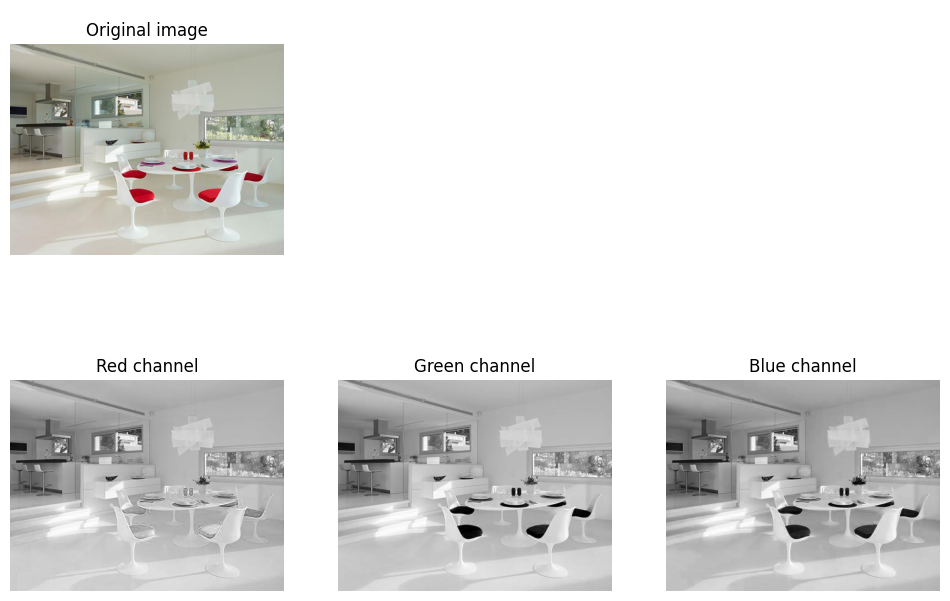

In [249]:
#Your solution

image_sillas = io.imread('images_notebook/sillas.jpg')


fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(12,8))

ax = axs[0][0]
ax.imshow(image_sillas)
ax.axis('off')
ax.set_title('Original image')


ax = axs[0][1]
ax.axis('off')
ax = axs[0][2]
ax.axis('off')



ax = axs[1][0]
# RGB layer 1 is Red channel
image_sillas_red_channel = image_sillas[:,:,0] 
ax.imshow(image_sillas_red_channel, cmap='gray')
ax.axis('off')
ax.set_title('Red channel')


ax = axs[1][1]
# RGB layer 2 is Green channel
image_sillas_green_channel = image_sillas[:,:,1]
ax.imshow(image_sillas_green_channel, cmap='gray')
ax.axis('off')
ax.set_title('Green channel')


ax = axs[1][2]
# RGB layer 3 is Blue channel
image_sillas_blue_channel = image_sillas[:,:,2]
ax.imshow(image_sillas_blue_channel, cmap='gray')
ax.axis('off')
ax.set_title('Blue channel')


plt.show()


b) Construct and visualize a new image, changing the red and green channels each other (see figure).

<img src="images_notebook/sillas2.png">

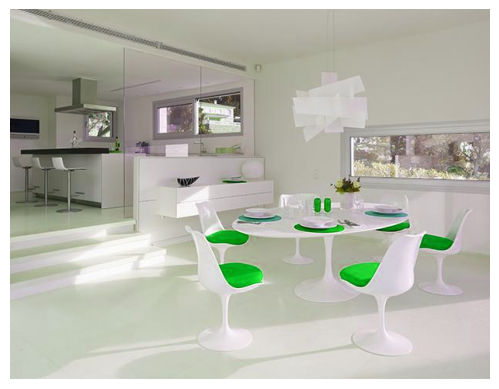

In [250]:
#Your solution

new_image_sillas = image_sillas.copy()

# exchange the R channel and the G channel
new_image_sillas[:,:,0], new_image_sillas[:,:,1] = image_sillas[:,:,1], image_sillas[:,:,0]

plt.imshow(new_image_sillas)
plt.axis('off')
plt.show()



### 1.6 Masks and logical image manipulation

a) Read the image `images_notebook/circles.bmp` (see figure top) and define 3 images in such a way that each one contains only 1 ball (see figure bottom). Visualize the 3 images in the same figure, each one with its corresponding title.

<img src="images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

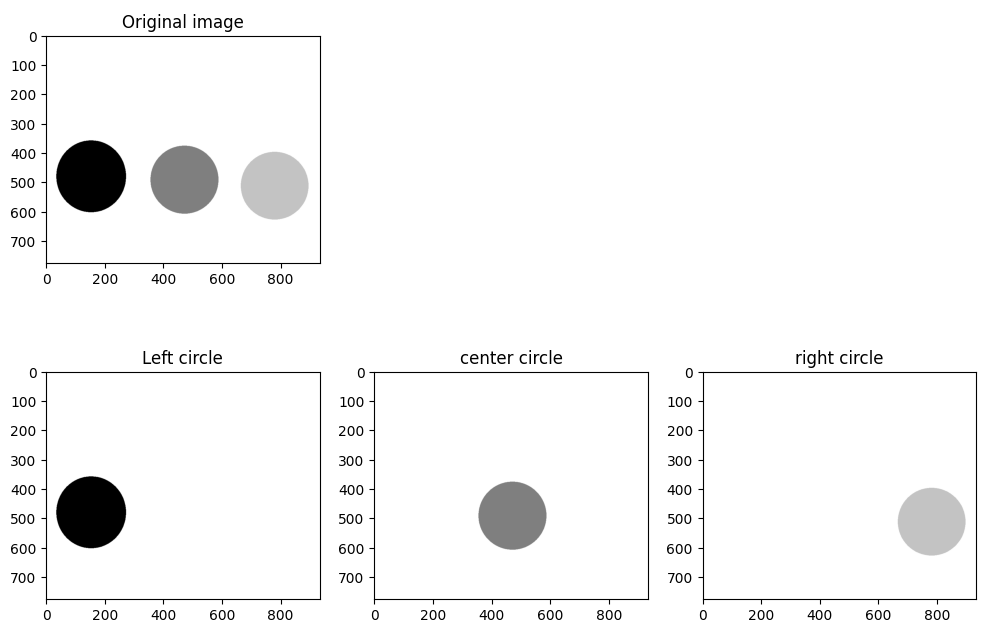

In [251]:
#Your solution
fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(12,8))


image_circles = io.imread('images_notebook/circles.bmp')

# get unique values of the image circles, get the value of each circle
circle = np.unique(image_circles)

ax = axs[0][0]
ax.imshow(image_circles)
ax.set_title('Original image')


ax = axs[0][1]
ax.axis('off')
ax = axs[0][2]
ax.axis('off')


left_circle = image_circles.copy()
# Set everything that is not a black circle in the original image to white
left_circle[image_circles != circle[0]] = 255
ax = axs[1][0]
ax.imshow(left_circle, cmap='gray')
ax.set_title('Left circle')


center_circle = image_circles.copy()
# Set everything that is not a grey circle in the original image to white
center_circle[image_circles != circle[1]] = 255
ax = axs[1][1]
ax.imshow(center_circle, cmap='gray')
ax.set_title('center circle')


right_circle = image_circles.copy()
# Set everything that is not a brown circle in the original image to white
right_circle[image_circles != circle[2]] = 255
ax = axs[1][2]
ax.imshow(right_circle, cmap='gray')
ax.set_title('right circle')


plt.show()

b) Given the images `images_notebook/coat.png` and `images_notebook/model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/ex17d.png">

**Note:** when applying [resize, rotate, etc...](https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html) keep track how the image type and values range change. When necessary, apply type conversion using [img_as_float, img_as_uint, img_as_ubyte.](https://scikit-image.org/docs/stable/api/skimage.html)

**Note: DO NOT USE LOOPS to overlap the images!! It will be penalized.**


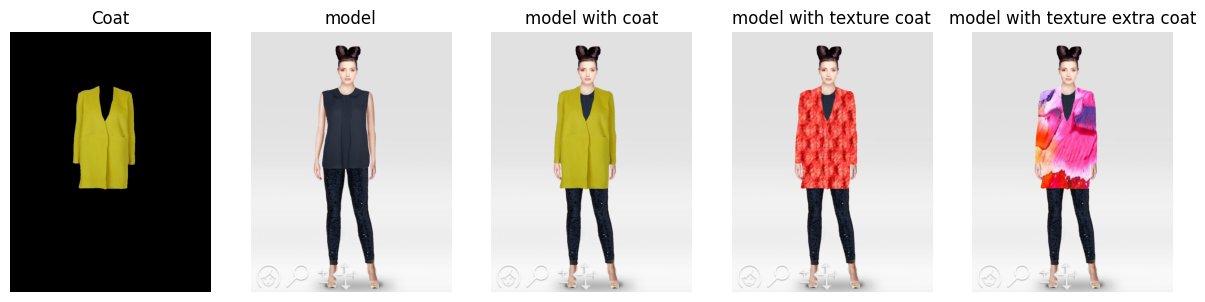

In [252]:
#Your solution

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15,15))


image_coat = io.imread('images_notebook/coat.png')
image_model = io.imread('images_notebook/model.png')
image_texture2 = io.imread('images_notebook/texture2.png')
image_texture3 = io.imread('images_notebook/texture3.jpg')


ax = axs[0]
ax.imshow(image_coat, cmap='gray')
ax.axis('off')
ax.set_title('Coat')


ax = axs[1]
ax.imshow(image_model, cmap='gray')
ax.axis('off')
ax.set_title('model')


ax = axs[2]
# convert rgba to rgb and same type of image, images of different shapes and data types cannot be manipulated
image_coat = img_as_ubyte(rgba2rgb(image_coat))
image_model = img_as_ubyte(rgba2rgb(image_model))
image_model_with_coat = image_model.copy()
# set the pixes that are not black on the image coat on the image model
image_model_with_coat[image_coat != 0] = image_coat[image_coat != 0]
ax.imshow(image_model_with_coat, cmap='gray')
ax.axis('off')
ax.set_title('model with coat')


# try new texture coat
ax = axs[3]
image_texture2 = img_as_ubyte(image_texture2)
image_model_with_texture_coat = image_model.copy()
image_model_with_texture_coat[image_coat != 0] = image_texture2[image_coat != 0]
ax.imshow(image_model_with_texture_coat, cmap='gray')
ax.axis('off')
ax.set_title('model with texture coat')


# try extra texture coat
ax = axs[4]
# resize the extra texture image to the same shape as the image model
image_texture3 = resize(image_texture3,(image_model.shape[0], image_model.shape[1]))
image_texture3 = img_as_ubyte(image_texture3)
image_model_with_texture_coat_extra = image_model.copy()
image_model_with_texture_coat_extra[image_coat != 0] = image_texture3[image_coat != 0]
ax.imshow(image_model_with_texture_coat_extra, cmap='gray')
ax.axis('off')
ax.set_title('model with texture extra coat')


plt.show()